<a href="https://colab.research.google.com/github/1070rahul/1070rahul/blob/main/Food_Delivery_Cost_and_Profitability_Analysis_using_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Food Delivery Cost and Profitability Analysis
dated: 19/04/2024




# Aim Of The Project

This analysis is aimed at understanding and optimizing the financial dynamics of a food delivery operation. The Goal is to identify the areas where the service can reduce costs, increase revenue, and enhance profitability.
Also the analysis aims to provide insights into how profitable the food delivery service is on a per-order basis.

# Process we can follow

1. Start by gathering comprehensive data related to all aspects of food delivery operations.
2. Clean the dataset for inconsistencies, missing values, or irrelevant information.
3. Extract relevant features that could impact cost and profitability.
4. Break down the costs associated with each order, including fixed costs (like packaging) and variable costs (like delivery fees and discounts).
5. Determine the revenue generated from each order, focusing on commission fees and the order value before discounts.
6. For each order, calculate the profit by subtracting the total costs from the revenue. Analyze the distribution of profitability across all orders to identify trends.
7. Based on the cost and profitability analysis, develop strategic recommendations aimed at enhancing profitability.
8. Use the data to simulate the financial impact of proposed changes, such as adjusting discount or commission rates.

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
orders = pd.read_csv('/content/food_orders_new_delhi.csv')

In [51]:
orders.head()

,Order ID,Customer ID,Restaurant ID,Order Date and Time,Delivery Date and Time,Order Value,Delivery Fee,Payment Method,Discounts and Offers,Commission Fee,Payment Processing Fee,Refunds/Chargebacks
0,1,C8270,R2924,2024-02-01 01:11:52,2024-02-01 02:39:52,1914,0,Credit Card,5% on App,150,47,0
1,2,C1860,R2054,2024-02-02 22:11:04,2024-02-02 22:46:04,986,40,Digital Wallet,10%,198,23,0
2,3,C6390,R2870,2024-01-31 05:54:35,2024-01-31 06:52:35,937,30,Cash on Delivery,15% New User,195,45,0
3,4,C6191,R2642,2024-01-16 22:52:49,2024-01-16 23:38:49,1463,50,Cash on Delivery,NaN,146,27,0
4,5,C6734,R2799,2024-01-29 01:19:30,2024-01-29 02:48:30,1992,30,Cash on Delivery,50 off Promo,130,50,0


In [52]:
orders.shape

(1000, 12)

In [58]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Order ID                1000 non-null   int64         
 1   Customer ID             1000 non-null   object        
 2   Restaurant ID           1000 non-null   object        
 3   Order Date and Time     1000 non-null   datetime64[ns]
 4   Delivery Date and Time  1000 non-null   datetime64[ns]
 5   Order Value             1000 non-null   int64         
 6   Delivery Fee            1000 non-null   int64         
 7   Payment Method          1000 non-null   object        
 8   Discounts and Offers    815 non-null    object        
 9   Commission Fee          1000 non-null   int64         
 10  Payment Processing Fee  1000 non-null   int64         
 11  Refunds/Chargebacks     1000 non-null   int64         
dtypes: datetime64[ns](2), int64(6), object(4)
memory 

# Data cleaning

The dataset contains no missing values.

Cleaning steps:
1. Convert "order date and time" and "Delivery Date and Time" to a datetime format.
2. Convert "Discounts and Offers" to a consistent numric value. or calculate the discount amounts.
3. Ensure all monetary values aer in a suitable format.

In [57]:
from datetime import datetime

In [ ]:
# convert date and time columns to datetime
orders.columns

Index(['Order ID', 'Customer ID', 'Restaurant ID', 'Order Date and Time',
       'Delivery Date and Time', 'Order Value', 'Delivery Fee',
       'Payment Method', 'Discounts and Offers', 'Commission Fee',
       'Payment Processing Fee', 'Refunds/Chargebacks'],
      dtype='object')

In [56]:
orders['Order Date and Time'] = pd.to_datetime(orders['Order Date and Time'])
orders['Delivery Date and Time'] = pd.to_datetime(orders['Delivery Date and Time'])

In [12]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Order ID                1000 non-null   int64         
 1   Customer ID             1000 non-null   object        
 2   Restaurant ID           1000 non-null   object        
 3   Order Date and Time     1000 non-null   datetime64[ns]
 4   Delivery Date and Time  1000 non-null   datetime64[ns]
 5   Order Value             1000 non-null   int64         
 6   Delivery Fee            1000 non-null   int64         
 7   Payment Method          1000 non-null   object        
 8   Discounts and Offers    815 non-null    object        
 9   Commission Fee          1000 non-null   int64         
 10  Payment Processing Fee  1000 non-null   int64         
 11  Refunds/Chargebacks     1000 non-null   int64         
dtypes: datetime64[ns](2), int64(6), object(4)
memory 

In [55]:
# Creating a function to extract numeric values from the Discounts and offers string

def extract_dis(discount_str): # function definition for extract_dis. Takes one argument 'distcount_str'

  # The line checks if the substring 'off' is present in the discout_str. If it is
  # the code under this if statement will execute
  if 'off' in discount_str:

    # This line will split the discount_str by spaces and
    # takes the first element from the string and converts it to float.
    return float(discount_str.split( ' ')[0])

  # The line checks if there is '%' present in the discount_str
  elif '%' in discount_str:
    return float(discount_str.split('%')[0])

  # This else block will execute if neither off nor % were found in discount_str.
  else:
    return 0.0

In [ ]:
# apply the function and create a new columns Discount percentage and Discount Amount
orders['Discount Percentage'] = orders['Discounts and Offers'].apply(lambda x : extract_dis(x) )

If you run this above code you will get an error because the discount_str has both float and string values in it. so it will through an error in the If 'off' block statement.

So creating this function in another way

In [59]:
# Creating a function to extract numeric values from the Discounts and offers string
def extract_dis(discount_str): # function definition for extract_dis. Takes one argument 'distcount_str'

  if isinstance(discount_str, str): # to check if the discount_str argument is string

      # The line checks if the substring 'off' is present in the discout_str. If it is
      # the code under this if statement will execute
    if 'off' in discount_str:
      return float(discount_str.split( ' ')[0])

      # The line checks if there is '%' present in the discount_str
    elif '%' in discount_str:
      return float(discount_str.split('%')[0])

      # This else block will execute if neither off nor % were found in discount_str.
    else:
      return 0.0

  elif isinstance(discount_str, float): #To check if the discount_str is float
    return discount_str
  else:
    raise TypeError("Invalid discount_str type")

In [60]:
# apply the function and create a new columns Discount percentage and Discount Amount
orders['Discount Percentage'] = orders['Discounts and Offers'].apply(lambda x : extract_dis(x) )

In [61]:
# discount amount based on the order values
orders['Discount Amount'] = orders.apply(lambda x: (x['Order Value']*x['Discount Percentage']/100)
if x['Discount Percentage'] > 1 else x['Discount Percentage'], axis = 1)

In [62]:
# adjust discount amount for fixed discounts directly specified in the Discounts and Offers col.
orders['Discount Amount'] = orders.apply(lambda x: x['Discount Amount'] if x['Discount Percentage']<=1
                                         else x['Order Value']* x['Discount Percentage']/100, axis = 1)

In [63]:
orders[['Order Value', 'Discounts and Offers', 'Discount Percentage', 'Discount Amount']].head(), orders.dtypes

(   Order Value Discounts and Offers  Discount Percentage  Discount Amount
 0         1914            5% on App                  5.0            95.70
 1          986                  10%                 10.0            98.60
 2          937         15% New User                 15.0           140.55
 3         1463                  NaN                  NaN              NaN
 4         1992         50 off Promo                 50.0           996.00,
 Order ID                           int64
 Customer ID                       object
 Restaurant ID                     object
 Order Date and Time       datetime64[ns]
 Delivery Date and Time    datetime64[ns]
 Order Value                        int64
 Delivery Fee                       int64
 Payment Method                    object
 Discounts and Offers              object
 Commission Fee                     int64
 Payment Processing Fee             int64
 Refunds/Chargebacks                int64
 Discount Percentage              float64
 Di

In [90]:
orders.describe().T

,count,mean,min,25%,50%,75%,max,std
Order ID,815.0,498.051534,1.0,243.5,497.0,748.5,1000.0,291.673785
Order Date and Time,815,2024-01-20 09:07:49.706748416,2024-01-01 02:12:47,2024-01-11 16:31:10,2024-01-20 08:57:59,2024-01-30 03:26:26,2024-02-07 22:23:39,NaN
Delivery Date and Time,815,2024-01-20 10:21:25.117791232,2024-01-01 03:59:47,2024-01-11 18:16:40,2024-01-20 10:31:37,2024-01-30 04:48:14.500000,2024-02-07 23:53:39,NaN
Order Value,815.0,1055.352147,104.0,598.5,1039.0,1496.0,1995.0,528.574689
Delivery Fee,815.0,28.355828,0.0,20.0,30.0,40.0,50.0,17.206536
Commission Fee,815.0,127.359509,50.0,91.0,128.0,164.0,200.0,42.827545
Payment Processing Fee,815.0,29.906748,10.0,20.0,30.0,40.0,50.0,11.726663
Refunds/Chargebacks,815.0,27.055215,0.0,0.0,0.0,50.0,150.0,48.32492
Discount Percentage,815.0,19.957055,5.0,10.0,10.0,15.0,50.0,17.536326
Discount Amount,815.0,213.813313,5.6,59.725,119.1,238.125,996.0,237.791452


# Observation:
1. Order date and time and delivery date and time columns have been converted to datetime format.
2. A new column discount amount has been calculated on the basis of discounts and offers. by extracting the percentage discounts or fixed amounts and applying them to the order value.
3. discount percentage has been added to represent discount rate or fixed amount discount directly.

# Cost and Profit analysis
- Considering Delivery Fee, Payment Processing Fee, Discount Amount. These all costs are asssociated with the order.

- calculating the total cost per order and then aggregate this data to understand the overall cost.

- The revenue for the platform is mainly derived from the Commission Fee. So we will calculate the net profit by subtracting the total costs from the revenue of commision fees.


In [30]:
orders.columns

Index(['Order ID', 'Customer ID', 'Restaurant ID', 'Order Date and Time',
       'Delivery Date and Time', 'Order Value', 'Delivery Fee',
       'Payment Method', 'Discounts and Offers', 'Commission Fee',
       'Payment Processing Fee', 'Refunds/Chargebacks', 'Discount Percentage',
       'Discount Amount'],
      dtype='object')

In [64]:
# calculate total costs and revenue per order
orders['Total Costs'] = orders['Delivery Fee'] + orders['Payment Processing Fee'] + orders['Discount Amount']
orders['Revenue'] = orders['Commission Fee']
orders['Profit'] = orders['Revenue'] - orders['Total Costs']

In [37]:
orders.head()

,Order ID,Customer ID,Restaurant ID,Order Date and Time,Delivery Date and Time,Order Value,Delivery Fee,Payment Method,Discounts and Offers,Commission Fee,Payment Processing Fee,Refunds/Chargebacks,Discount Percentage,Discount Amount,Total Costs,Revenue,Profit
0,1,C8270,R2924,2024-02-01 01:11:52,2024-02-01 02:39:52,1914,0,Credit Card,5% on App,150,47,0,5.0,95.70,142.70,150,7.30
1,2,C1860,R2054,2024-02-02 22:11:04,2024-02-02 22:46:04,986,40,Digital Wallet,10%,198,23,0,10.0,98.60,161.60,198,36.40
2,3,C6390,R2870,2024-01-31 05:54:35,2024-01-31 06:52:35,937,30,Cash on Delivery,15% New User,195,45,0,15.0,140.55,215.55,195,-20.55
3,4,C6191,R2642,2024-01-16 22:52:49,2024-01-16 23:38:49,1463,50,Cash on Delivery,NaN,146,27,0,NaN,NaN,NaN,146,NaN
4,5,C6734,R2799,2024-01-29 01:19:30,2024-01-29 02:48:30,1992,30,Cash on Delivery,50 off Promo,130,50,0,50.0,996.00,1076.00,130,-946.00


In [65]:
orders.shape

(1000, 17)

In [66]:
orders.isnull().sum()

Order ID                    0
Customer ID                 0
Restaurant ID               0
Order Date and Time         0
Delivery Date and Time      0
Order Value                 0
Delivery Fee                0
Payment Method              0
Discounts and Offers      185
Commission Fee              0
Payment Processing Fee      0
Refunds/Chargebacks         0
Discount Percentage       185
Discount Amount           185
Total Costs               185
Revenue                     0
Profit                    185
dtype: int64

We can see some null values so droping these null values

In [69]:
orders.dropna(inplace= True)

In [70]:
orders.shape

(815, 17)

In [71]:
# aggregate te data to get overall metrics
total_orders = orders.shape[0]
total_revenue = orders.Revenue.sum()
total_costs = orders['Total Costs'].sum()
total_profit = orders.Profit.sum()

In [72]:
print('Total Orders: ', total_orders)
print('Total Revenue: ', total_revenue)
print('Total Costs: ', total_costs)
print('Total Profit: ', total_profit)

Total Orders:  815
Total Revenue:  103798
Total Costs:  221741.84999999998
Total Profit:  -117943.84999999998


Observation:
1. It shows that the total costs exceeds the revenue generated from commission fees, resulting in a net loss.
2. It suggests that the current commissoin rates, delivery charges and discount strageties are sustainable for profitablility.

To better understand distribution of costs, revenue and profit let's understand it through plots.

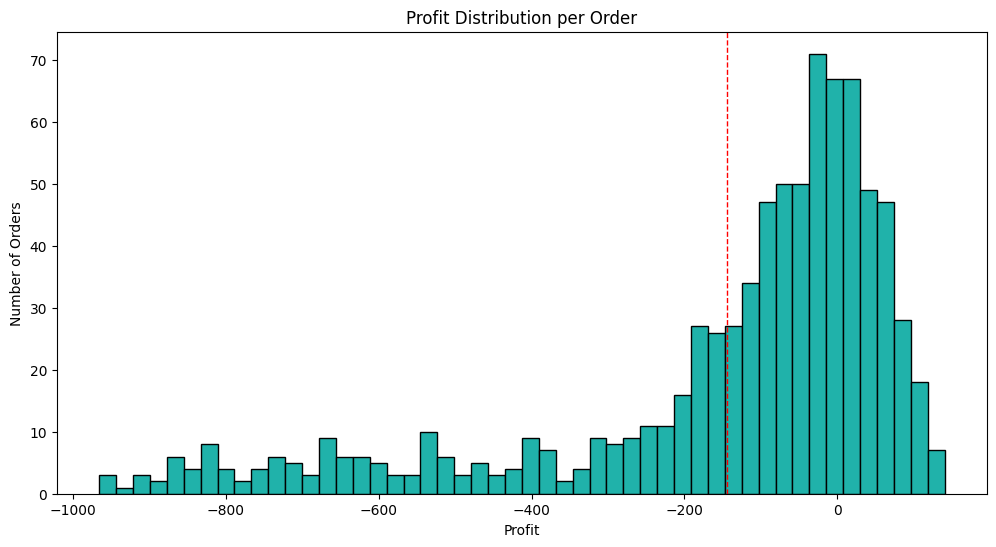

In [86]:
# Histogram of profits per order
plt.figure(figsize = (12,6))
plt.hist(orders['Profit'], bins = 50, color = 'lightseagreen', edgecolor = 'black')
plt.title('Profit Distribution per Order')
plt.xlabel('Profit')
plt.ylabel('Number of Orders')
plt.axvline(orders.Profit.mean(), color = 'red', linestyle = 'dashed', linewidth = 1)
plt.show()

Observation:
1. Noticable number of orders resulting in a loss.
2. red dash line shows the average profit, which is in the negative territory.
3. business might need to investigate the causes of the frequent lower profits or losses and devise strategies to improve profitability.

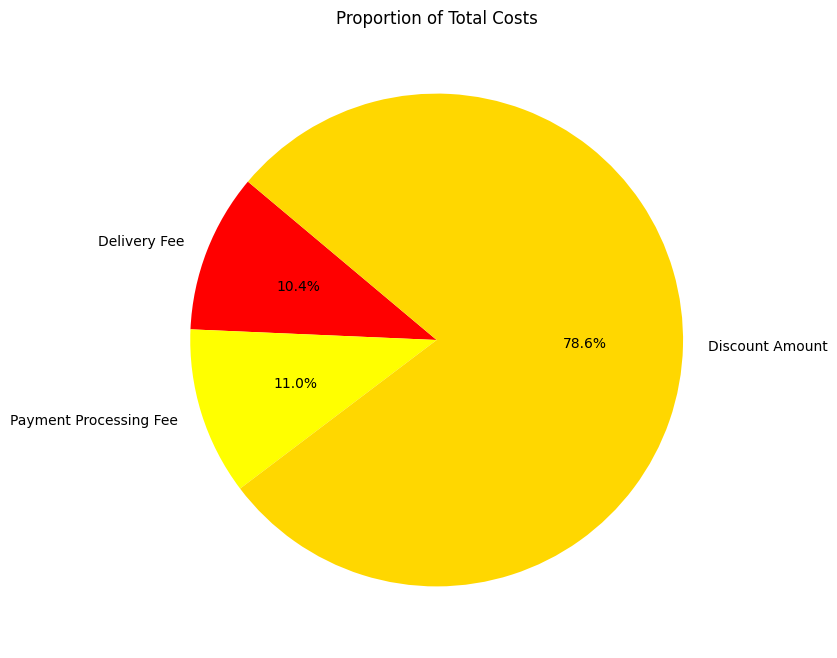

In [92]:
# Pie chart to check the proportion of total costs.
costs = orders[['Delivery Fee','Payment Processing Fee', 'Discount Amount']].sum()
plt.figure(figsize = (8,8))
plt.pie(costs, labels = costs.index, autopct = '%1.1f%%', startangle = 140, colors = ['red', 'yellow', 'gold'])
plt.title('Proportion of Total Costs')
plt.show()

observation:
- Discounts constitute a significant portion of the costs, suggesting that promotional discount strategies might be heavily impacting overall profitability.

## Let’s compare total revenue, total costs, and total profit:

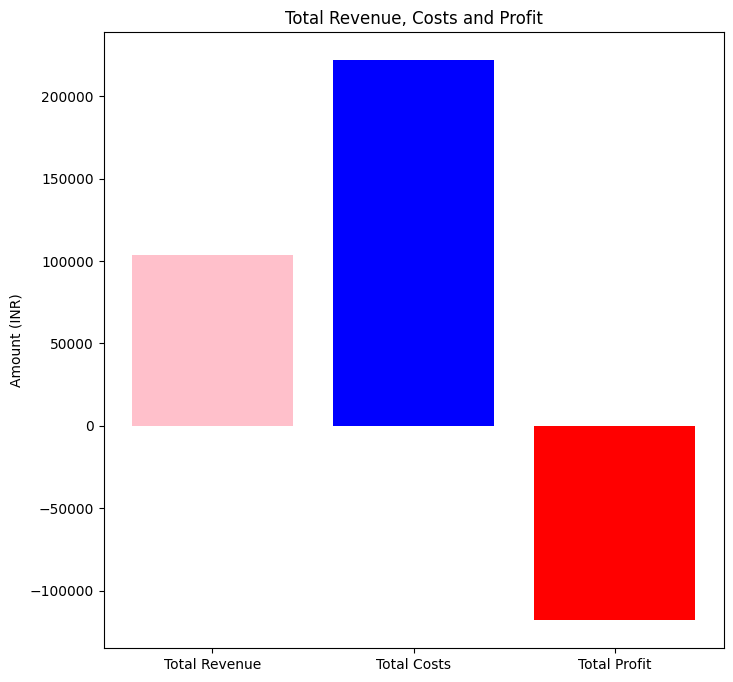

In [94]:
# Ploting bar chart for total revenue, costs, and profit

total = ['Total Revenue', 'Total Costs', 'Total Profit']
values = [total_revenue, total_costs, total_profit]
plt.figure(figsize = (8,8))
plt.bar(total, values, color = ['pink', 'blue', 'red'])
plt.title('Total Revenue, Costs and Profit')
plt.ylabel('Amount (INR)')
plt.show()

Observation:
- From the above graph it is clear that total costs surpasses the revenue resulting in a loss.

# Let's create a New Strategy for Profit


We need to look for:
- new average commission fee based on profitable orders.
- new average discount percentage for profitable orders.

Let's calculate:
- The average commission percentage for profitable orders.
- The average discount percentage for profitable orders.

In [95]:
# fitering the dataset for profitable orders
profitable_orders = orders[orders.Profit > 0]

In [97]:
profitable_orders.head()

,Order ID,Customer ID,Restaurant ID,Order Date and Time,Delivery Date and Time,Order Value,Delivery Fee,Payment Method,Discounts and Offers,Commission Fee,Payment Processing Fee,Refunds/Chargebacks,Discount Percentage,Discount Amount,Total Costs,Revenue,Profit
0,1,C8270,R2924,2024-02-01 01:11:52,2024-02-01 02:39:52,1914,0,Credit Card,5% on App,150,47,0,5.0,95.70,142.70,150,7.30
1,2,C1860,R2054,2024-02-02 22:11:04,2024-02-02 22:46:04,986,40,Digital Wallet,10%,198,23,0,10.0,98.60,161.60,198,36.40
5,6,C7265,R2777,2024-01-25 04:36:52,2024-01-25 05:27:52,439,20,Cash on Delivery,10%,92,27,150,10.0,43.90,90.90,92,1.10
6,7,C1466,R2457,2024-01-12 23:55:48,2024-01-13 00:48:48,303,30,Digital Wallet,5% on App,144,12,50,5.0,15.15,57.15,144,86.85
7,8,C5426,R2978,2024-01-26 22:46:24,2024-01-27 00:36:24,260,0,Credit Card,10%,55,19,0,10.0,26.00,45.00,55,10.00


In [98]:
# Calculate the average commission % for profitable orders
profitable_orders['Commission Percentage'] = (profitable_orders['Commission Fee']/profitable_orders['Order Value']) *100

In [99]:
profitable_orders.head()

,Order ID,Customer ID,Restaurant ID,Order Date and Time,Delivery Date and Time,Order Value,Delivery Fee,Payment Method,Discounts and Offers,Commission Fee,Payment Processing Fee,Refunds/Chargebacks,Discount Percentage,Discount Amount,Total Costs,Revenue,Profit,Commission Percentage
0,1,C8270,R2924,2024-02-01 01:11:52,2024-02-01 02:39:52,1914,0,Credit Card,5% on App,150,47,0,5.0,95.70,142.70,150,7.30,7.836991
1,2,C1860,R2054,2024-02-02 22:11:04,2024-02-02 22:46:04,986,40,Digital Wallet,10%,198,23,0,10.0,98.60,161.60,198,36.40,20.081136
5,6,C7265,R2777,2024-01-25 04:36:52,2024-01-25 05:27:52,439,20,Cash on Delivery,10%,92,27,150,10.0,43.90,90.90,92,1.10,20.956720
6,7,C1466,R2457,2024-01-12 23:55:48,2024-01-13 00:48:48,303,30,Digital Wallet,5% on App,144,12,50,5.0,15.15,57.15,144,86.85,47.524752
7,8,C5426,R2978,2024-01-26 22:46:24,2024-01-27 00:36:24,260,0,Credit Card,10%,55,19,0,10.0,26.00,45.00,55,10.00,21.153846


In [100]:
# Calculate the average discount percentage for profitable orders
profitable_orders['Effective Discount Percentage'] = (profitable_orders['Discount Amount']/profitable_orders['Order Value'])*100

In [102]:
profitable_orders.head()

,Order ID,Customer ID,Restaurant ID,Order Date and Time,Delivery Date and Time,Order Value,Delivery Fee,Payment Method,Discounts and Offers,Commission Fee,Payment Processing Fee,Refunds/Chargebacks,Discount Percentage,Discount Amount,Total Costs,Revenue,Profit,Commission Percentage,Effective Discount Percentage
0,1,C8270,R2924,2024-02-01 01:11:52,2024-02-01 02:39:52,1914,0,Credit Card,5% on App,150,47,0,5.0,95.70,142.70,150,7.30,7.836991,5.0
1,2,C1860,R2054,2024-02-02 22:11:04,2024-02-02 22:46:04,986,40,Digital Wallet,10%,198,23,0,10.0,98.60,161.60,198,36.40,20.081136,10.0
5,6,C7265,R2777,2024-01-25 04:36:52,2024-01-25 05:27:52,439,20,Cash on Delivery,10%,92,27,150,10.0,43.90,90.90,92,1.10,20.956720,10.0
6,7,C1466,R2457,2024-01-12 23:55:48,2024-01-13 00:48:48,303,30,Digital Wallet,5% on App,144,12,50,5.0,15.15,57.15,144,86.85,47.524752,5.0
7,8,C5426,R2978,2024-01-26 22:46:24,2024-01-27 00:36:24,260,0,Credit Card,10%,55,19,0,10.0,26.00,45.00,55,10.00,21.153846,10.0


In [103]:
# calculating the new averages
new_avg_com_percent = profitable_orders['Commission Percentage'].mean()
new_avg_disc_percent = profitable_orders['Effective Discount Percentage'].mean()
print(new_avg_com_percent, new_avg_disc_percent)

36.99030453177021 9.938775510204081


Observation:
- New Average Commission Percentage: 36.99% or 37%
- New Average Discount Pecentage: 9.9 % or 10%

based on this analysis, Higher commission rate and low discount rates could potentially improve the profitablity.

# Let's visualize a comparison of actual versus recommended discounts and commission Percentage

In [104]:
# profitablility with recommende discounts and commissions
recommended_com_percent = 37
recommended_disc_percent = 10

# calculate the simulated commission fee and discount amount using recommended percentages
orders['Simulated Commission Fee'] = orders['Order Value'] * (recommended_com_percent / 100)
orders['Simulated Discount Amount'] = orders['Order Value'] * (recommended_disc_percent / 100)


In [105]:
orders.head()

,Order ID,Customer ID,Restaurant ID,Order Date and Time,Delivery Date and Time,Order Value,Delivery Fee,Payment Method,Discounts and Offers,Commission Fee,Payment Processing Fee,Refunds/Chargebacks,Discount Percentage,Discount Amount,Total Costs,Revenue,Profit,Simulated Commission Fee,Simulated Discount Amount
0,1,C8270,R2924,2024-02-01 01:11:52,2024-02-01 02:39:52,1914,0,Credit Card,5% on App,150,47,0,5.0,95.70,142.70,150,7.30,708.18,191.4
1,2,C1860,R2054,2024-02-02 22:11:04,2024-02-02 22:46:04,986,40,Digital Wallet,10%,198,23,0,10.0,98.60,161.60,198,36.40,364.82,98.6
2,3,C6390,R2870,2024-01-31 05:54:35,2024-01-31 06:52:35,937,30,Cash on Delivery,15% New User,195,45,0,15.0,140.55,215.55,195,-20.55,346.69,93.7
4,5,C6734,R2799,2024-01-29 01:19:30,2024-01-29 02:48:30,1992,30,Cash on Delivery,50 off Promo,130,50,0,50.0,996.00,1076.00,130,-946.00,737.04,199.2
5,6,C7265,R2777,2024-01-25 04:36:52,2024-01-25 05:27:52,439,20,Cash on Delivery,10%,92,27,150,10.0,43.90,90.90,92,1.10,162.43,43.9


In [107]:
# recalculate total costs and profit with simulated values
orders['Simulated Total Costs'] = (orders['Delivery Fee'] +
                                        orders['Payment Processing Fee'] +
                                        orders['Simulated Discount Amount'])
orders['Simulated Profit'] = (orders['Simulated Commission Fee'] -
                                   orders['Simulated Total Costs'])

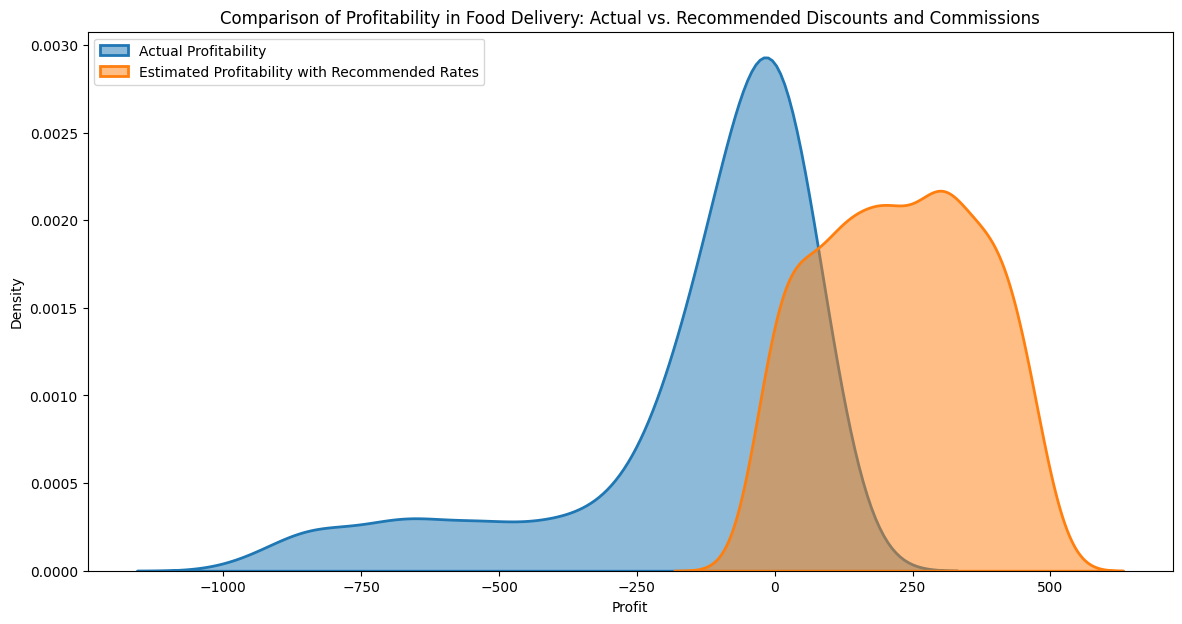

In [108]:
# visualizing the comparison
plt.figure(figsize=(14, 7))

# actual profitability
sns.kdeplot(orders['Profit'], label='Actual Profitability', fill=True, alpha=0.5, linewidth=2)

# simulated profitability
sns.kdeplot(orders['Simulated Profit'], label='Estimated Profitability with Recommended Rates', fill=True, alpha=0.5, linewidth=2)

plt.title('Comparison of Profitability in Food Delivery: Actual vs. Recommended Discounts and Commissions')
plt.xlabel('Profit')
plt.ylabel('Density')
plt.legend(loc='upper left')
plt.show()

## Conclusion:
- The actual profitability distribution shows that it's major portion lies in loss.
- The recommended or simulated distribution suggests a shifts towards higher profitability per order.
- The recommended distribution is more skewed towards positive side indicating a highr proportion of profitable orders.
